In [ ]:
#installing pmdarima to use ARIMA model
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#importing of libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import seaborn as sns
%matplotlib inline
from pmdarima import auto_arima

import warnings
warnings.simplefilter("ignore")
import re
pd.set_option('display.max_columns', None) #to display all colmuns in the dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/US_Sales_Data.csv')

In [ ]:
data.head()

,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,Order Quantity,Discount Applied,Unit Price,Unit Cost,SalesTeam,Customers,Products,StoreLocation_city,StoreLocation_county,State
0,SO - 000101,In-Store,WARE-UHY1004,12/31/2017,5/31/2018,6/14/2018,6/19/2018,USD,5,0.075,"1,963.10","1,001.18",Joshua Bennett,Rochester Ltd,Dining Furniture,Babylon (Town),Suffolk County,New York
1,SO - 000102,Online,WARE-NMK1003,12/31/2017,5/31/2018,6/22/2018,7/2/2018,USD,3,0.075,"3,939.60","3,348.66",Paul Holmes,Pacific Ltd,Wreaths,Overland Park,Johnson County,Kansas
2,SO - 000103,Distributor,WARE-UHY1004,12/31/2017,5/31/2018,6/21/2018,7/1/2018,USD,1,0.050,"1,775.50",781.22,Samuel Fowler,"3LAB, Ltd",Stemware,Ann Arbor,Washtenaw County,Michigan
3,SO - 000104,Wholesale,WARE-NMK1003,12/31/2017,5/31/2018,6/2/2018,6/7/2018,USD,8,0.075,"2,324.90","1,464.69",Carlos Miller,"Fenwal, Corp",Accessories,New Haven,New Haven County,Connecticut
4,SO - 000105,Distributor,WARE-NMK1003,4/10/2018,5/31/2018,6/16/2018,6/26/2018,USD,8,0.100,"1,822.40","1,476.14",Joe Price,Bare,Candles,Waterbury,New Haven County,Connecticut


In [ ]:
data.shape

(7991, 18)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7991 entries, 0 to 7990
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   OrderNumber           7991 non-null   object 
 1   Sales Channel         7991 non-null   object 
 2   WarehouseCode         7991 non-null   object 
 3   ProcuredDate          7991 non-null   object 
 4   OrderDate             7991 non-null   object 
 5   ShipDate              7991 non-null   object 
 6   DeliveryDate          7991 non-null   object 
 7   CurrencyCode          7991 non-null   object 
 8   Order Quantity        7991 non-null   int64  
 9   Discount Applied      7991 non-null   float64
 10  Unit Price            7991 non-null   object 
 11  Unit Cost             7991 non-null   object 
 12  SalesTeam             7991 non-null   object 
 13  Customers             7991 non-null   object 
 14  Products              7991 non-null   object 
 15  StoreLocation_city   

In [ ]:
df_m = data.copy()

In [ ]:
df = data.copy()

# **Data Cleaning**

In [ ]:
df.isnull().sum() #check for missing values

OrderNumber             0
Sales Channel           0
WarehouseCode           0
ProcuredDate            0
OrderDate               0
ShipDate                0
DeliveryDate            0
CurrencyCode            0
Order Quantity          0
Discount Applied        0
Unit Price              0
Unit Cost               0
SalesTeam               0
Customers               0
Products                0
StoreLocation_city      0
StoreLocation_county    0
State                   0
dtype: int64

In [ ]:
#convert all columns to lowercase
df.columns = df.columns.str.lower()

In [ ]:
df.columns

Index(['ordernumber', 'sales channel', 'warehousecode', 'procureddate',
       'orderdate', 'shipdate', 'deliverydate', 'currencycode',
       'order quantity', 'discount applied', 'unit price', 'unit cost',
       'salesteam', 'customers', 'products', 'storelocation_city',
       'storelocation_county', 'state'],
      dtype='object')

In [ ]:
#convert object datatype to datetime
df['shipdate'] = pd.to_datetime(df['shipdate'])
df['orderdate'] = pd.to_datetime(df['orderdate'])
df['deliverydate'] = pd.to_datetime(df['orderdate'])

In [ ]:
#renaming of columns
df.rename(columns = {'unit price':'unit_price'}, inplace = True)
df.rename(columns = {'unit cost':'unit_cost'}, inplace = True)
df.rename(columns = {'sales channel':'sales_channel'}, inplace = True)
df.rename(columns = {'order quantity':'order_quantity'}, inplace = True)
df.rename(columns = {'discount applied':'discount_applied'}, inplace = True)


In [ ]:
#remove unnecesarry punctuations from numbers
df['unit_price'] = df['unit_price'].str.replace(',','')
df['unit_cost'] = df['unit_cost'].str.replace(',','')

In [ ]:
df.head()

,ordernumber,sales_channel,warehousecode,procureddate,orderdate,shipdate,deliverydate,currencycode,order_quantity,discount_applied,unit_price,unit_cost,salesteam,customers,products,storelocation_city,storelocation_county,state
0,SO - 000101,In-Store,WARE-UHY1004,12/31/2017,2018-05-31,2018-06-14,2018-05-31,USD,5,0.075,1963.10,1001.18,Joshua Bennett,Rochester Ltd,Dining Furniture,Babylon (Town),Suffolk County,New York
1,SO - 000102,Online,WARE-NMK1003,12/31/2017,2018-05-31,2018-06-22,2018-05-31,USD,3,0.075,3939.60,3348.66,Paul Holmes,Pacific Ltd,Wreaths,Overland Park,Johnson County,Kansas
2,SO - 000103,Distributor,WARE-UHY1004,12/31/2017,2018-05-31,2018-06-21,2018-05-31,USD,1,0.050,1775.50,781.22,Samuel Fowler,"3LAB, Ltd",Stemware,Ann Arbor,Washtenaw County,Michigan
3,SO - 000104,Wholesale,WARE-NMK1003,12/31/2017,2018-05-31,2018-06-02,2018-05-31,USD,8,0.075,2324.90,1464.69,Carlos Miller,"Fenwal, Corp",Accessories,New Haven,New Haven County,Connecticut
4,SO - 000105,Distributor,WARE-NMK1003,4/10/2018,2018-05-31,2018-06-16,2018-05-31,USD,8,0.100,1822.40,1476.14,Joe Price,Bare,Candles,Waterbury,New Haven County,Connecticut


In [ ]:
#change datatype to float to aid calculation
df['unit_price'] = df['unit_price'].astype(float)
df['unit_cost'] = df['unit_cost'].astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7991 entries, 0 to 7990
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ordernumber           7991 non-null   object        
 1   sales_channel         7991 non-null   object        
 2   warehousecode         7991 non-null   object        
 3   procureddate          7991 non-null   object        
 4   orderdate             7991 non-null   datetime64[ns]
 5   shipdate              7991 non-null   datetime64[ns]
 6   deliverydate          7991 non-null   datetime64[ns]
 7   currencycode          7991 non-null   object        
 8   order_quantity        7991 non-null   int64         
 9   discount_applied      7991 non-null   float64       
 10  unit_price            7991 non-null   float64       
 11  unit_cost             7991 non-null   float64       
 12  salesteam             7991 non-null   object        
 13  customers         

In [ ]:
#claculating of total amount of products sold
df['total_amount'] = (df['unit_price'] * df['order_quantity']) - ((df['unit_price']*df['order_quantity'])*df['discount_applied']) #get the amount feature from other features

In [ ]:
df.head()

,ordernumber,sales_channel,warehousecode,procureddate,orderdate,shipdate,deliverydate,currencycode,order_quantity,discount_applied,unit_price,unit_cost,salesteam,customers,products,storelocation_city,storelocation_county,state,total_amount
0,SO - 000101,In-Store,WARE-UHY1004,12/31/2017,2018-05-31,2018-06-14,2018-05-31,USD,5,0.075,1963.1,1001.18,Joshua Bennett,Rochester Ltd,Dining Furniture,Babylon (Town),Suffolk County,New York,9079.3375
1,SO - 000102,Online,WARE-NMK1003,12/31/2017,2018-05-31,2018-06-22,2018-05-31,USD,3,0.075,3939.6,3348.66,Paul Holmes,Pacific Ltd,Wreaths,Overland Park,Johnson County,Kansas,10932.3900
2,SO - 000103,Distributor,WARE-UHY1004,12/31/2017,2018-05-31,2018-06-21,2018-05-31,USD,1,0.050,1775.5,781.22,Samuel Fowler,"3LAB, Ltd",Stemware,Ann Arbor,Washtenaw County,Michigan,1686.7250
3,SO - 000104,Wholesale,WARE-NMK1003,12/31/2017,2018-05-31,2018-06-02,2018-05-31,USD,8,0.075,2324.9,1464.69,Carlos Miller,"Fenwal, Corp",Accessories,New Haven,New Haven County,Connecticut,17204.2600
4,SO - 000105,Distributor,WARE-NMK1003,4/10/2018,2018-05-31,2018-06-16,2018-05-31,USD,8,0.100,1822.4,1476.14,Joe Price,Bare,Candles,Waterbury,New Haven County,Connecticut,13121.2800


In [ ]:
df.duplicated().sum() #checking for duplicates

0

# **Analysis**

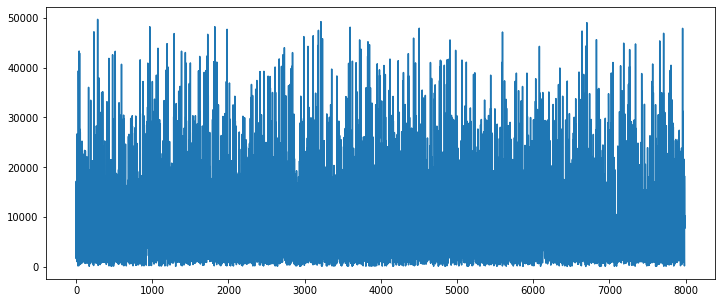

In [ ]:
#time series plot total amount
df['total_amount'].plot(figsize=(12,5))

In [ ]:
#Calculate average sales of goods sold

avg_monthly_sales = df.total_amount.mean()
print(f"Overall average monthly sales:  ₦{avg_monthly_sales}")

# Last 12 months (this will be the forecasted sales)
avg_monthly_sales_12month = df.total_amount[-12:].mean()
print(f"Last 12 months average monthly sales:  ₦{avg_monthly_sales_12month}")

Overall average monthly sales:  ₦9153.219840445501
Last 12 months average monthly sales:  ₦8421.690625


In [ ]:
#creating dataframe
avg_sales = [['avg_monthly_sales', 9153.22], ['avg_monthly_sales_12month', 8421.69]]
df_avg = pd.DataFrame(avg_sales, columns=['avg_name','avg_sales'])
df_avg

,avg_name,avg_sales
0,avg_monthly_sales,9153.22
1,avg_monthly_sales_12month,8421.69


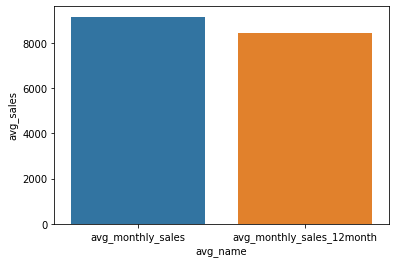

In [ ]:
sns.barplot(x='avg_name', y='avg_sales', data=df_avg)
plt.show()

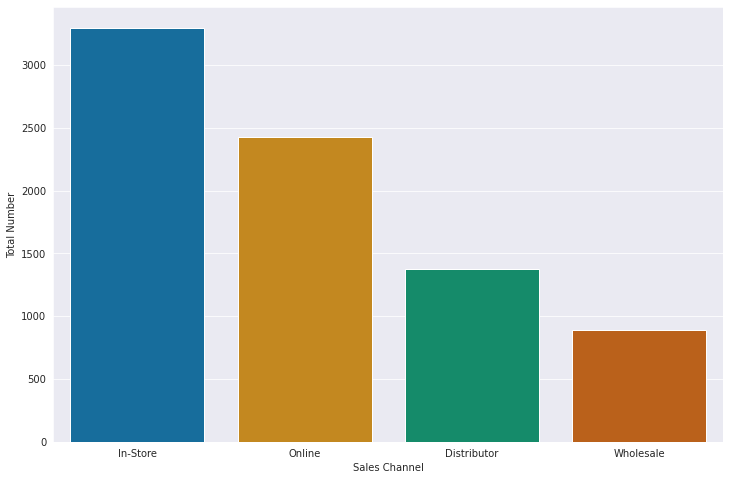

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize=(12,8))
sns.countplot(x ='sales_channel', data = df, palette='colorblind')
plt.xlabel('Sales Channel')
plt.ylabel('Total Number')
plt.show()

<Figure size 864x576 with 0 Axes>

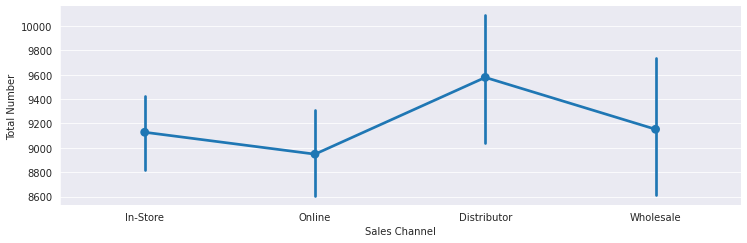

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize=(12,8))
sns.catplot(x="sales_channel", y="total_amount",data=df, kind='point', height=3.5, aspect=3)
plt.xlabel('Sales Channel')
plt.ylabel('Total Number')
plt.show()

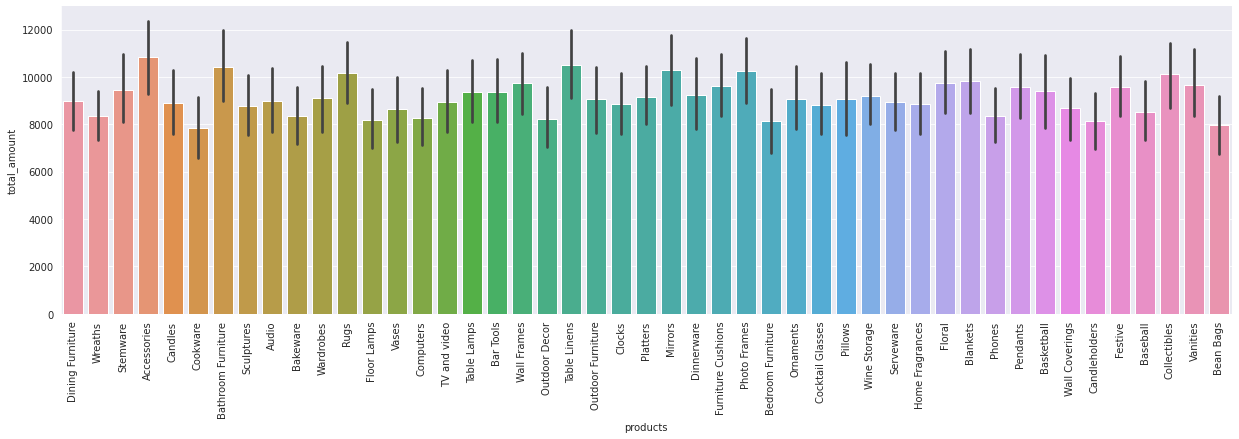

In [ ]:
sns.set_style("darkgrid")
sns.catplot(x="products", y="total_amount",data=df, kind='bar', height=5, aspect=3.5)
plt.xticks(rotation=90)
plt.show()

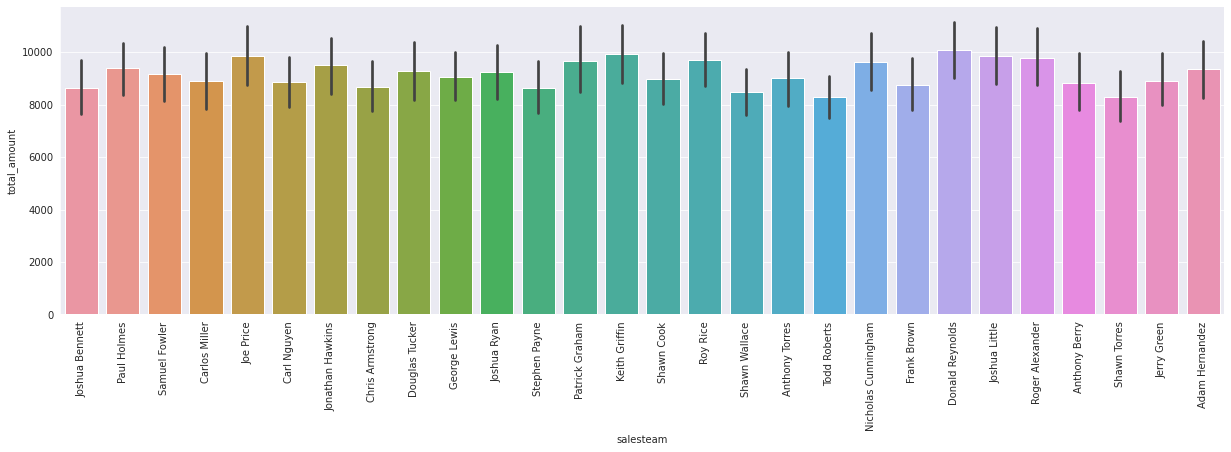

In [ ]:
sns.set_style("darkgrid")
sns.catplot(x="salesteam", y="total_amount",data=df, kind='bar', height=5, aspect=3.5)
plt.xticks(rotation=90)
plt.show()

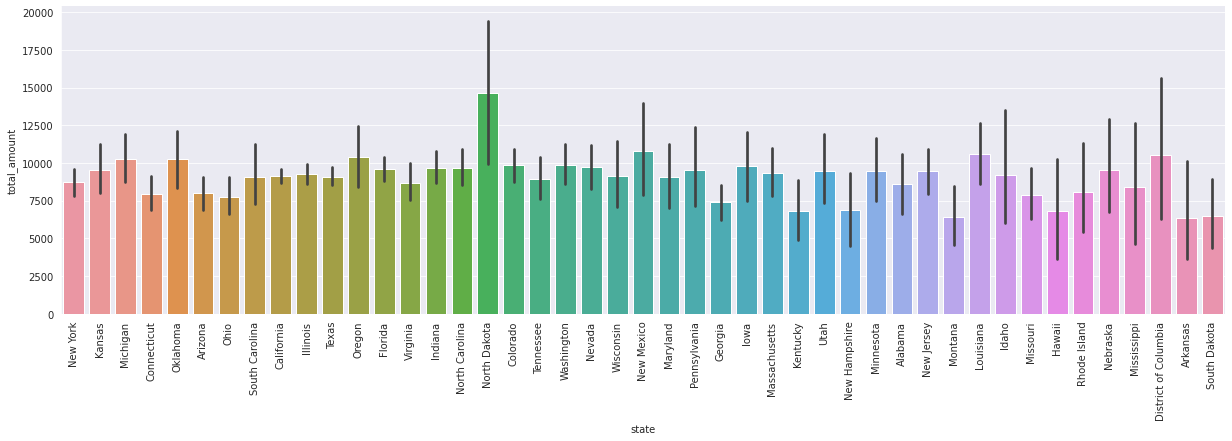

In [ ]:
sns.set_style("darkgrid")
sns.catplot(x="state", y="total_amount",data=df, kind='bar', height=5, aspect=3.5)
plt.xticks(rotation=90)
plt.show()

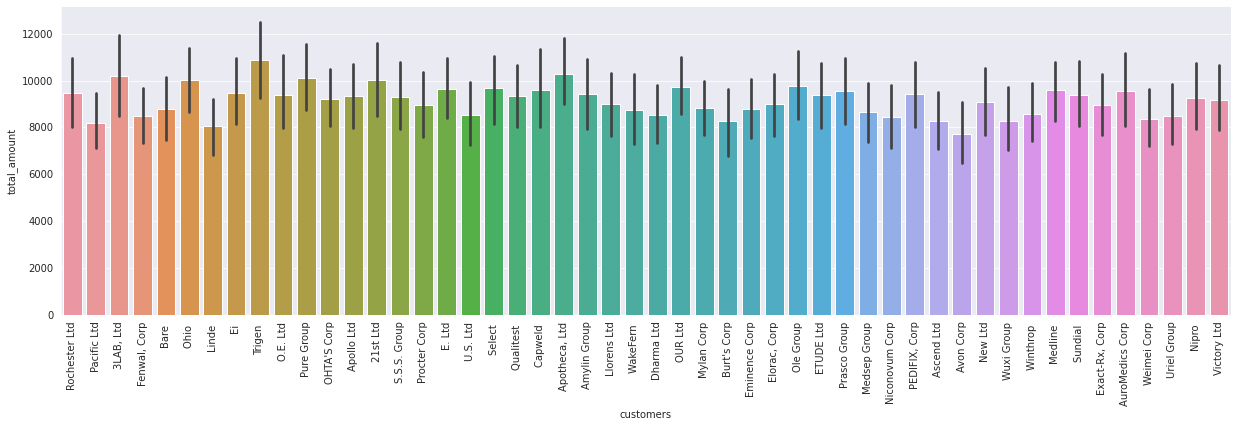

In [ ]:
sns.set_style("darkgrid")
sns.catplot(x="customers", y="total_amount",data=df, kind='bar', height=5, aspect=3.5)
plt.xticks(rotation=90)
plt.show()

In [ ]:
#Most sold item
df.groupby('products').count().sort_values(by = 'deliverydate' , ascending = False).head(n = 10)

,ordernumber,sales_channel,warehousecode,procureddate,orderdate,shipdate,deliverydate,currencycode,order_quantity,discount_applied,unit_price,unit_cost,salesteam,customers,storelocation_city,storelocation_county,state,total_amount
products,,,,,,,,,,,,,,,,,,
Serveware,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200
Platters,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200
Cocktail Glasses,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195
Accessories,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194
Wreaths,190,190,190,190,190,190,190,190,190,190,190,190,190,190,190,190,190,190
Rugs,184,184,184,184,184,184,184,184,184,184,184,184,184,184,184,184,184,184
Wardrobes,183,183,183,183,183,183,183,183,183,183,183,183,183,183,183,183,183,183
Ornaments,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182
Sculptures,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182


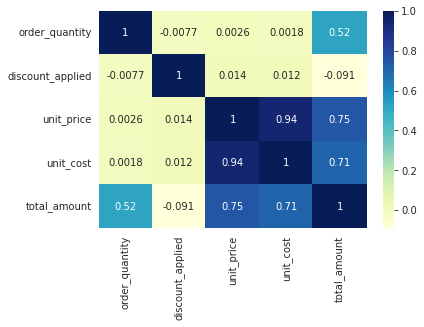

In [ ]:
#correlation of dataset
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

# **ARIMA MODEL**

In [ ]:
df.head()

,ordernumber,sales_channel,warehousecode,procureddate,orderdate,shipdate,deliverydate,currencycode,order_quantity,discount_applied,unit_price,unit_cost,salesteam,customers,products,storelocation_city,storelocation_county,state,total_amount
0,SO - 000101,In-Store,WARE-UHY1004,12/31/2017,2018-05-31,2018-06-14,2018-05-31,USD,5,0.075,1963.1,1001.18,Joshua Bennett,Rochester Ltd,Dining Furniture,Babylon (Town),Suffolk County,New York,9079.3375
1,SO - 000102,Online,WARE-NMK1003,12/31/2017,2018-05-31,2018-06-22,2018-05-31,USD,3,0.075,3939.6,3348.66,Paul Holmes,Pacific Ltd,Wreaths,Overland Park,Johnson County,Kansas,10932.3900
2,SO - 000103,Distributor,WARE-UHY1004,12/31/2017,2018-05-31,2018-06-21,2018-05-31,USD,1,0.050,1775.5,781.22,Samuel Fowler,"3LAB, Ltd",Stemware,Ann Arbor,Washtenaw County,Michigan,1686.7250
3,SO - 000104,Wholesale,WARE-NMK1003,12/31/2017,2018-05-31,2018-06-02,2018-05-31,USD,8,0.075,2324.9,1464.69,Carlos Miller,"Fenwal, Corp",Accessories,New Haven,New Haven County,Connecticut,17204.2600
4,SO - 000105,Distributor,WARE-NMK1003,4/10/2018,2018-05-31,2018-06-16,2018-05-31,USD,8,0.100,1822.4,1476.14,Joe Price,Bare,Candles,Waterbury,New Haven County,Connecticut,13121.2800


In [ ]:
#importing additional libraries to build model
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.model_selection import train_test_split

In [ ]:
#test for stationarity of the dataset
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )

In [ ]:
adfuller_test(df['total_amount'])

ADF Test Statistic : -50.75536215086405
p-value : 0.0
#Lags Used : 2
Number of Observations Used : 7988


In [ ]:
#generating arima order of model building
stepwise_fit = auto_arima(df['total_amount'], trace=True, suppress_warnings=True)

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=168062.316, Time=2.46 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=168055.631, Time=0.27 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=168057.595, Time=0.31 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=168057.596, Time=0.65 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=173800.931, Time=0.19 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=168059.600, Time=1.62 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 5.550 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 7991
Model:                        SARIMAX   Log Likelihood              -84025.816
Date:                Fri, 06 Jan 2023   AIC                         168055.631
Time:                        12:02:21   BIC                         168069.603
Sample:                             0   HQIC                        168060.414
                               - 7991                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   9153.2198    152.366     60.074      0.000    8854.587    9451.853
sigma2      7.958e+07   1.29e+06     61.794      0.000    7.71e+07    8.21e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):              5397.42
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               0.97   Skew:                             1.60
Prob(H) (two-sided):                  0.45   Kurtosis:                         5.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
#spliting of dataset into test and train data
train, test = train_test_split(df, train_size = 0.8, test_size = 0.2)

In [ ]:
#building and fitting of arima model
model=ARIMA(df['total_amount'],order=(1,0,0))
model_fit=model.fit()

In [ ]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           total_amount   No. Observations:                 7991
Model:                 ARIMA(1, 0, 0)   Log Likelihood              -84025.798
Date:                Fri, 06 Jan 2023   AIC                         168057.595
Time:                        12:02:22   BIC                         168078.554
Sample:                             0   HQIC                        168064.769
                               - 7991                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       9153.2198    100.024     91.510      0.000    8957.177    9349.263
ar.L1          0.0021      0.011      0.189      0.850      -0.020       0.024
sigma2      7.959e+07      0.009   8.88e+09      0.000    7.96e+07    7.96e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              5397.05
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.97   Skew:                             1.60
Prob(H) (two-sided):                  0.45   Kurtosis:                         5.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.38e+23. Standard errors may be unstable.
"""

In [ ]:
start = len(train)
end = len(train)+len(test)-1
pred = model_fit.predict(start=start,end=end, type='levels')
#pred.index = df.index[start:end+1]
print(pred)

6392    9135.829280
6393    9135.117258
6394    9148.007553
6395    9145.853012
6396    9136.153314
           ...     
7986    9136.801382
7987    9134.264182
7988    9172.526117
7989    9166.264304
7990    9150.176307
Name: predicted_mean, Length: 1599, dtype: float64


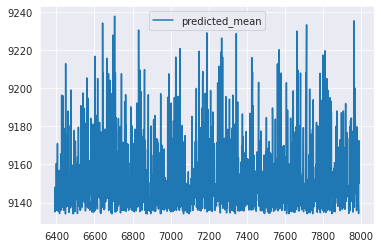

In [ ]:
pred.plot(legend=True)

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['total_amount']))
print(rmse)

8798.844287502805


In [ ]:
model2 = ARIMA(df['total_amount'], order=(1,0,0))
model2_fit = model2.fit()

In [ ]:
df.tail()

,ordernumber,sales_channel,warehousecode,procureddate,orderdate,shipdate,deliverydate,currencycode,order_quantity,discount_applied,unit_price,unit_cost,salesteam,customers,products,storelocation_city,storelocation_county,state,total_amount
7986,SO - 0008087,In-Store,WARE-MKL1006,9/26/2020,2020-12-30,2021-01-07,2020-12-30,USD,1,0.075,234.5,121.94,Joshua Ryan,Weimei Corp,Pendants,San Angelo,Tom Green County,Texas,216.9125
7987,SO - 0008088,Online,WARE-NMK1003,9/26/2020,2020-12-30,2021-01-02,2020-12-30,USD,6,0.050,3202.6,1921.56,Paul Holmes,"Apotheca, Ltd",Table Lamps,Lafayette,Lafayette Parish,Louisiana,18254.8200
7988,SO - 0008089,Online,WARE-UHY1004,9/26/2020,2020-12-30,2021-01-23,2020-12-30,USD,5,0.200,3825.7,2792.76,Paul Holmes,OHTA'S Corp,Table Linens,Manchester,Hillsborough County,New Hampshire,15302.8000
7989,SO - 0008090,Online,WARE-NMK1003,9/26/2020,2020-12-30,2021-01-20,2020-12-30,USD,8,0.100,1072.0,804.00,Anthony Torres,Llorens Ltd,Clocks,Waterbury (Town),New Haven County,Connecticut,7718.4000
7990,SO - 0008091,In-Store,WARE-UHY1004,9/26/2020,2020-12-30,2021-01-13,2020-12-30,USD,5,0.075,2211.0,1370.82,Joshua Bennett,Weimei Corp,Festive,Winston-Salem,Forsyth County,North Carolina,10225.8750


In [ ]:
#generating future prediction
index_future_dates = pd.date_range(start='2020-12-31', end='2021-01-30')
pred2 = model2_fit.predict(start=len(df), end=len(df)+30, type='levels').rename('ARIMA Predictions')
pred2.index=index_future_dates
print(pred2)

2020-12-31    9155.495152
2021-01-01    9153.224667
2021-01-02    9153.219851
2021-01-03    9153.219840
2021-01-04    9153.219840
2021-01-05    9153.219840
2021-01-06    9153.219840
2021-01-07    9153.219840
2021-01-08    9153.219840
2021-01-09    9153.219840
2021-01-10    9153.219840
2021-01-11    9153.219840
2021-01-12    9153.219840
2021-01-13    9153.219840
2021-01-14    9153.219840
2021-01-15    9153.219840
2021-01-16    9153.219840
2021-01-17    9153.219840
2021-01-18    9153.219840
2021-01-19    9153.219840
2021-01-20    9153.219840
2021-01-21    9153.219840
2021-01-22    9153.219840
2021-01-23    9153.219840
2021-01-24    9153.219840
2021-01-25    9153.219840
2021-01-26    9153.219840
2021-01-27    9153.219840
2021-01-28    9153.219840
2021-01-29    9153.219840
2021-01-30    9153.219840
Freq: D, Name: ARIMA Predictions, dtype: float64


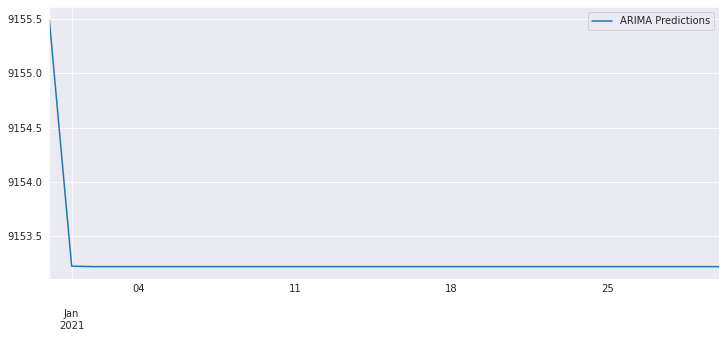

In [ ]:
#plotting of future predictions
pred2.plot(figsize=(12,5), legend=True)

# **Regression models**

In [ ]:
df_m.columns = df_m.columns.str.lower()

In [ ]:
df_m['shipdate'] = pd.to_datetime(df_m['shipdate'])
df_m['orderdate'] = pd.to_datetime(df_m['orderdate'])
df_m['deliverydate'] = pd.to_datetime(df_m['orderdate'])

In [ ]:
df_m.rename(columns = {'unit price':'unit_price'}, inplace = True)
df_m.rename(columns = {'unit cost':'unit_cost'}, inplace = True)
df_m.rename(columns = {'sales channel':'sales_channel'}, inplace = True)
df_m.rename(columns = {'order quantity':'order_quantity'}, inplace = True)


In [ ]:
df_m['unit_price'] = df_m['unit_price'].str.replace(',','')
df_m['unit_cost'] = df_m['unit_cost'].str.replace(',','')

In [ ]:
df_m['unit_price'] = df_m['unit_price'].astype(float)
df_m['unit_cost'] = df_m['unit_cost'].astype(float)


In [ ]:
#calculating total amount
df_m['total_amount'] = (df_m['unit_price'] * df_m['order_quantity']) - ((df_m['unit_price']*df_m['order_quantity'])*df_m['discount applied'])

In [ ]:
df_m.head()

,ordernumber,sales_channel,warehousecode,procureddate,orderdate,shipdate,deliverydate,currencycode,order_quantity,discount applied,unit_price,unit_cost,salesteam,customers,products,storelocation_city,storelocation_county,state,total_amount
0,SO - 000101,In-Store,WARE-UHY1004,12/31/2017,2018-05-31,2018-06-14,2018-05-31,USD,5,0.075,1963.1,1001.18,Joshua Bennett,Rochester Ltd,Dining Furniture,Babylon (Town),Suffolk County,New York,9079.3375
1,SO - 000102,Online,WARE-NMK1003,12/31/2017,2018-05-31,2018-06-22,2018-05-31,USD,3,0.075,3939.6,3348.66,Paul Holmes,Pacific Ltd,Wreaths,Overland Park,Johnson County,Kansas,10932.3900
2,SO - 000103,Distributor,WARE-UHY1004,12/31/2017,2018-05-31,2018-06-21,2018-05-31,USD,1,0.050,1775.5,781.22,Samuel Fowler,"3LAB, Ltd",Stemware,Ann Arbor,Washtenaw County,Michigan,1686.7250
3,SO - 000104,Wholesale,WARE-NMK1003,12/31/2017,2018-05-31,2018-06-02,2018-05-31,USD,8,0.075,2324.9,1464.69,Carlos Miller,"Fenwal, Corp",Accessories,New Haven,New Haven County,Connecticut,17204.2600
4,SO - 000105,Distributor,WARE-NMK1003,4/10/2018,2018-05-31,2018-06-16,2018-05-31,USD,8,0.100,1822.4,1476.14,Joe Price,Bare,Candles,Waterbury,New Haven County,Connecticut,13121.2800


In [ ]:
df_m.isnull().sum()

ordernumber             0
sales_channel           0
warehousecode           0
procureddate            0
orderdate               0
shipdate                0
deliverydate            0
currencycode            0
order_quantity          0
discount applied        0
unit_price              0
unit_cost               0
salesteam               0
customers               0
products                0
storelocation_city      0
storelocation_county    0
state                   0
total_amount            0
dtype: int64

In [ ]:
df_m.duplicated().sum()

0

In [ ]:

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor


In [ ]:
#selecting of feature and target variabel
y = df_m["total_amount"]
X = df_m[['order_quantity', 'discount applied', 'unit_price', 'unit_cost']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2)

In [ ]:
X_train.shape

(6392, 4)

In [ ]:
X_test.shape

(1599, 4)

In [ ]:
#liner regression model and fitting of X and y variables
lr=LinearRegression()
lr.fit(X_train, y_train)
y_pred_unscaled=lr.predict(X_test)

In [ ]:
#calculating RMSE, MAE and R2 values
model_scores = {}
def get_scores(y_test,y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_test,y_pred))
    mae = mean_absolute_error(y_test,y_pred)
    r2 = r2_score(y_test,y_pred)
    model_scores[model_name] = [rmse, mae, r2]

    print(f"RMSE: {rmse}")
    print(f"MAE: {mae}")
    print(f"R2 Score: {r2}")

In [ ]:
get_scores(y_test,y_pred_unscaled, 'Linear Regression UnScaled')

RMSE: 3490.778327454044
MAE: 2505.039557587662
R2 Score: 0.8424826280411221


In [ ]:
#Scaling of numerical values
def scale_data(X_train, X_test):
    #apply Min Max Scaler
    scaler = MinMaxScaler()
    x_train_scaled = scaler.fit_transform(X_train)
    x_test_scaled = scaler.fit_transform(X_test)
    return x_train_scaled, x_test_scaled

x_train_scaled, x_test_scaled=scale_data(X_train, X_test)

In [ ]:
lr=LinearRegression()
lr.fit(x_train_scaled, y_train)
y_pred_scaled=lr.predict(x_test_scaled)

In [ ]:
get_scores(y_test,y_pred_scaled, 'Linear Regression Scaled')

RMSE: 3491.2091496861613
MAE: 2506.6412639827436
R2 Score: 0.8424437449227524


In [ ]:
train=df_m.iloc[:-1599]
test = df_m.iloc[-1599:]

In [ ]:
pred=pd.DataFrame(y_pred_unscaled)

In [ ]:
pred

,0
0,-5934.362444
1,6630.385762
2,7413.670983
3,4475.666508
4,618.285434
...,...
1594,-5752.604554
1595,16488.775131
1596,15479.519231
1597,11535.281903


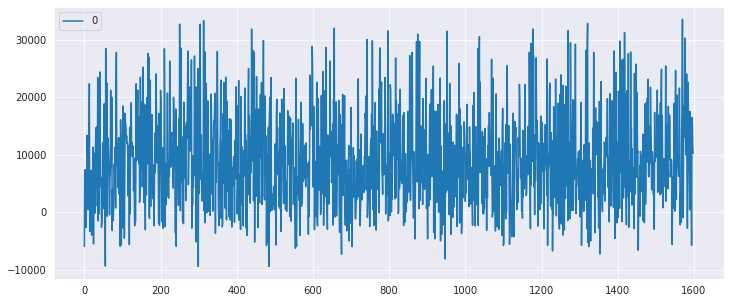

In [ ]:
pred.plot(figsize = (12, 5))

In [ ]:
date_amount=test[['orderdate', 'total_amount']].reset_index(drop=True)

In [ ]:
date_amount

,orderdate,total_amount
0,2020-06-27,619.0800
1,2020-06-27,6695.9800
2,2020-06-27,5680.2600
3,2020-06-27,1107.5100
4,2020-06-28,1704.3125
...,...,...
1594,2020-12-30,216.9125
1595,2020-12-30,18254.8200
1596,2020-12-30,15302.8000
1597,2020-12-30,7718.4000


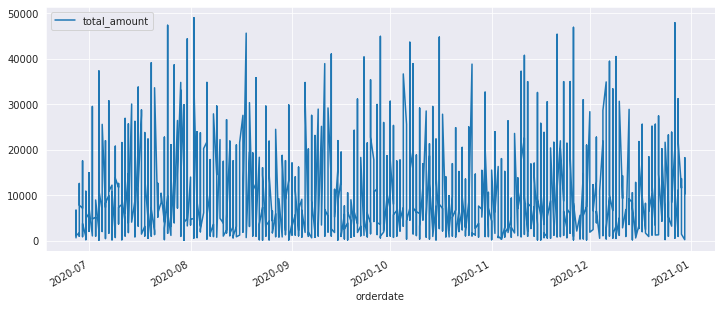

In [ ]:
date_amount.set_index('orderdate').plot(figsize = (12, 5))

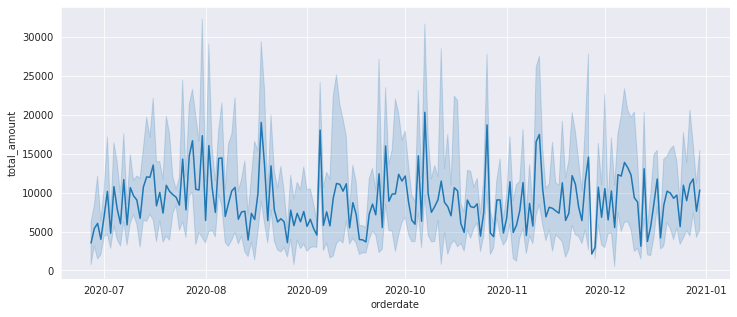

In [ ]:
plt.figure(figsize = (12,5))
sns.lineplot(x = 'orderdate', y = 'total_amount', data = date_amount)
plt.show()

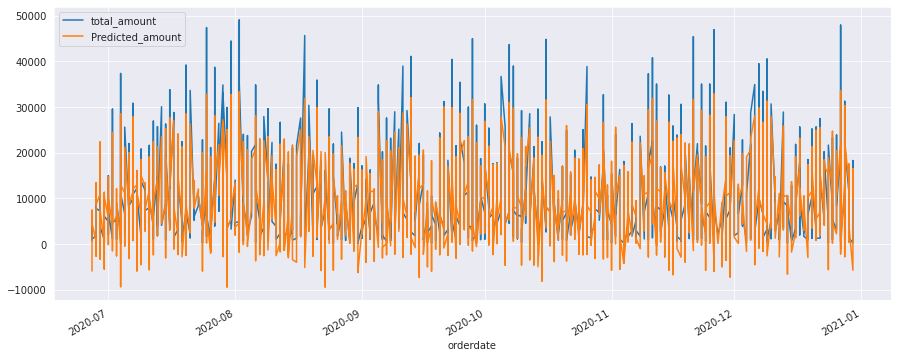

In [ ]:
#plot of predicted values vs original amount
pd.concat([date_amount, pred], axis=1).rename(columns={0:'Predicted_amount', 'amount':'original_amount'}).set_index('orderdate').plot(kind='line', figsize=(15,6))

**Gradient Boosting regressor**

In [ ]:
#gradient boost regressor model and fitting of X and y variables
gb = GradientBoostingRegressor(n_estimators = 100, learning_rate = 0.2)
gb.fit(X_train, y_train)
y_pred_unscaled=gb.predict(X_test)

In [ ]:
get_scores(y_test,y_pred_unscaled, 'Gradient Boosting UnScaled')

RMSE: 367.20307587557824
MAE: 255.49373289260492
R2 Score: 0.9982570034149424


In [ ]:
gb = GradientBoostingRegressor(n_estimators = 100, learning_rate = 0.2)
gb.fit(x_train_scaled, y_train)
y_pred_scaled=gb.predict(x_test_scaled)

In [ ]:
get_scores(y_test,y_pred_scaled, 'Gradient boosting Scaled')

RMSE: 353.73245917227166
MAE: 250.77325445961924
R2 Score: 0.9983825392820445


In [ ]:
train=df_m.iloc[:-1599]
test = df_m.iloc[-1599:]

In [ ]:
pred=pd.DataFrame(y_pred_unscaled)

In [ ]:
date_amount=test[['orderdate', 'total_amount']].reset_index(drop=True)

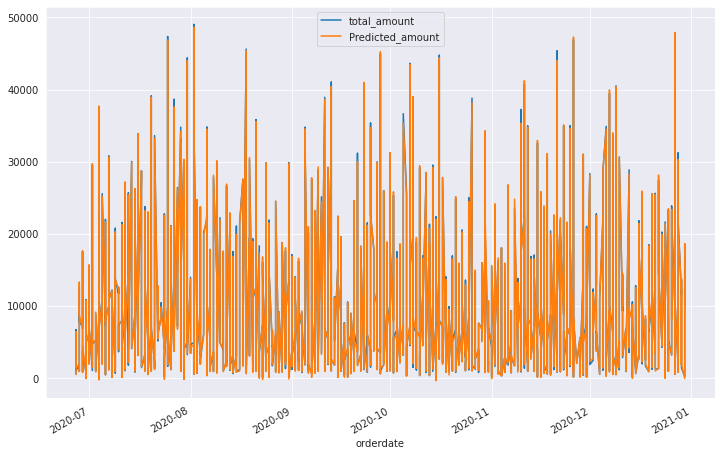

In [ ]:
pd.concat([date_amount, pred], axis=1).rename(columns={0:'Predicted_amount', 'amount':'original_amount'}).set_index('orderdate').plot(kind='line', figsize=(12,8))

**Ada Boosting Regressor**

In [ ]:
#Ada Boosting regressor model and fitting of X and y variables
ab = AdaBoostRegressor(n_estimators = 100, learning_rate = 0.2)
ab.fit(X_train, y_train)
y_pred_unscaled=ab.predict(X_test)

In [ ]:
get_scores(y_test,y_pred_unscaled, 'Ada Boost UnScaled')

RMSE: 2173.28353975035
MAE: 1685.6641567922568
R2 Score: 0.9389456380748032


In [ ]:
ab = AdaBoostRegressor(n_estimators = 100, learning_rate = 0.2)
ab.fit(x_train_scaled, y_train)
y_pred_scaled=ab.predict(x_test_scaled)

In [ ]:
get_scores(y_test,y_pred_scaled, 'Ada Boost Scaled')

RMSE: 2159.460448270841
MAE: 1702.2746657064204
R2 Score: 0.9397198362188366


In [ ]:
train=df_m.iloc[:-1599]
test = df_m.iloc[-1599:]

In [ ]:
pred=pd.DataFrame(y_pred_unscaled)

In [ ]:
date_amount=test[['orderdate', 'total_amount']].reset_index(drop=True)

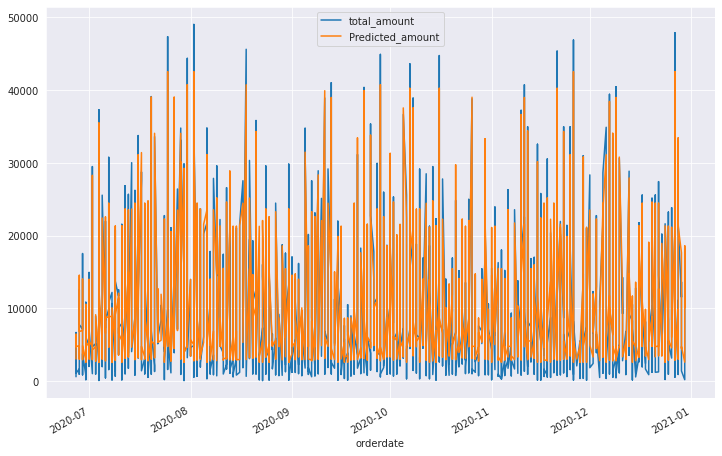

In [ ]:
pd.concat([date_amount, pred], axis=1).rename(columns={0:'Predicted_amount', 'amount':'original_amount'}).set_index('orderdate').plot(kind='line', figsize=(12,8))

**Random forest regressor**

In [ ]:
#Random forest regressor model and fitting of X and y variables
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred_unscaled=rf.predict(X_test)


In [ ]:
y_pred_unscaled

array([  648.7744  ,  6658.3327  ,  5702.2293  , ..., 15618.102   ,
        7745.3072  ,  9939.609125])

In [ ]:
get_scores(y_test,y_pred_unscaled, 'Linear Regression UnScaled')

RMSE: 378.20821451948893
MAE: 129.1664580519079
R2 Score: 0.9981509620278068


In [ ]:
rf=RandomForestRegressor()
rf.fit(x_train_scaled, y_train)
y_pred_scaled=rf.predict(x_test_scaled)

In [ ]:
get_scores(y_test,y_pred_scaled, 'Random Forest Scaled')

RMSE: 372.1283494895357
MAE: 131.91826726078813
R2 Score: 0.9982099324129005


In [ ]:
train=df_m.iloc[:-1599]
test = df_m.iloc[-1599:]

In [ ]:
pred=pd.DataFrame(y_pred_unscaled)

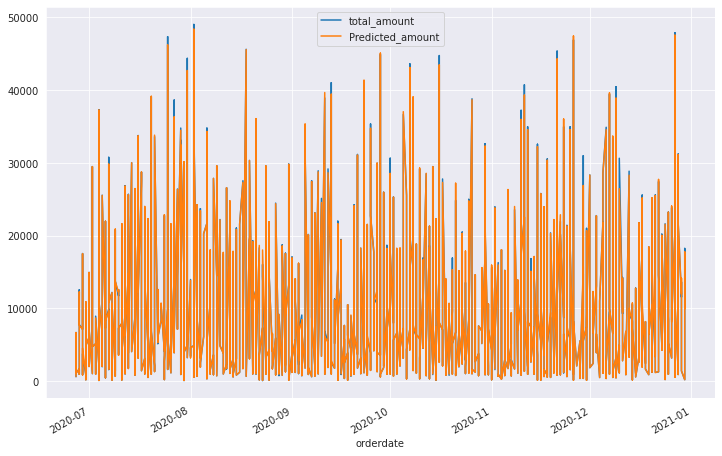

In [ ]:
pd.concat([date_amount, pred], axis=1).rename(columns={0:'Predicted_amount', 'amount':'original_amount'}).set_index('orderdate').plot(kind='line', figsize=(12,8))

In [ ]:
import pickle

In [ ]:
pickle.dump(rf, open('model_scores.p', 'wb'))